In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)
scaled_df = pd.DataFrame(scaled_data, index=market_data_df.index, columns=market_data_df.columns)

scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [5]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

# Output the inertia values for each k
print("Inertia values for each k:", inertia)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)

Inertia values for each k: [287.0, 212.1233420748626, 165.1367523344681, 79.02243535120977, 66.41305075939438, 61.6340881106822, 46.074467441030215, 43.39269411734827, 32.91322265971525, 30.469111293270355]
    k     inertia
0   1  287.000000
1   2  212.123342
2   3  165.136752
3   4   79.022435
4   5   66.413051
5   6   61.634088
6   7   46.074467
7   8   43.392694
8   9   32.913223
9  10   30.469111


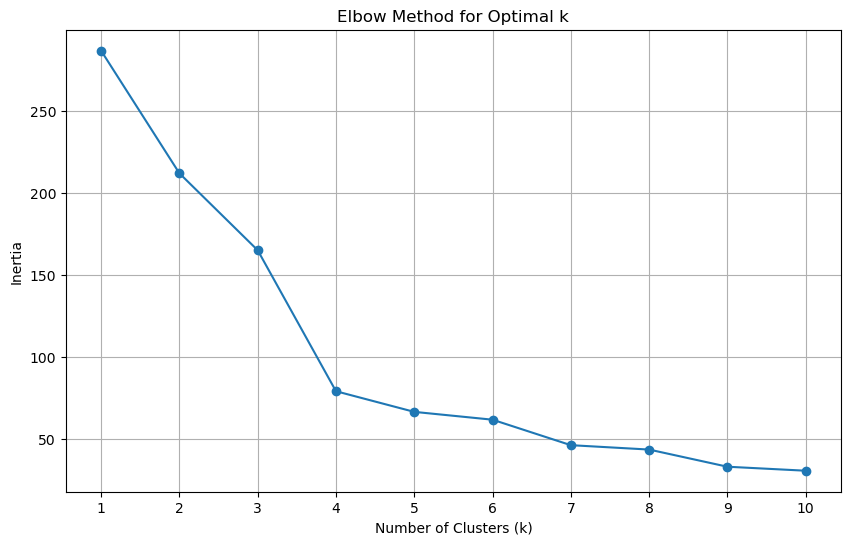

In [6]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for k is around 4, where the inertia begins to decrease at a slower rate, indicating that adding more clusters does not show significant improvement in cluster quality.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [7]:
# Initialize the K-Means model using the best value for k
k = 4
model = KMeans(n_clusters=k, n_init='auto', random_state=1)

In [8]:
# Fit the K-Means model using the scaled data
model.fit(scaled_df)

KMeans(n_clusters=4, random_state=1)

In [9]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(scaled_df)

# View the resulting array of cluster values.
print(clusters)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [10]:
# Create a copy of the DataFrame
df_copy = scaled_df.copy() 

In [11]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['Cluster'] = clusters

# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


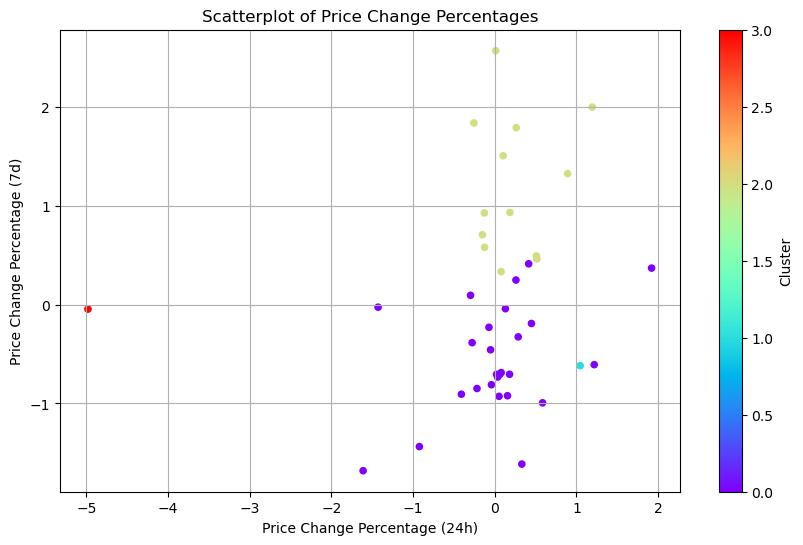

In [12]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
df_copy.plot(kind='scatter', 
              x='price_change_percentage_24h', 
              y='price_change_percentage_7d', 
              c='Cluster',  
              colormap='rainbow',  
              figsize=(10, 6))

plt.title('Scatterplot of Price Change Percentages')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.grid()
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [13]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [25]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
principal_components = pca_model.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
principal_components[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [26]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_model.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is .895.

In [27]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2', 'PCA3'])


# Copy the crypto names from the original data
pca_df["Coin_ID"] = market_data_df.index

# Set the coinid column as index
pca_df = pca_df.set_index("Coin_ID")

# Display sample data
pca_df.head()


,PCA1,PCA2,PCA3
Coin_ID,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [28]:
k_values = list(range(1, 11))


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

for i in k_values:
    
    model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    model.fit(pca_df)
    inertia.append(model.inertia_)

# Output the inertia values for each k
print("Inertia values for each k:", inertia)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow_pca)


Inertia values for each k: [256.8740855678926, 182.33953007775654, 135.44240762454214, 49.66549665179738, 38.67258217591797, 34.50757653758154, 23.72836478127477, 18.5745234401832, 15.572672210433339, 11.407666572096915]
    k     inertia
0   1  256.874086
1   2  182.339530
2   3  135.442408
3   4   49.665497
4   5   38.672582
5   6   34.507577
6   7   23.728365
7   8   18.574523
8   9   15.572672
9  10   11.407667


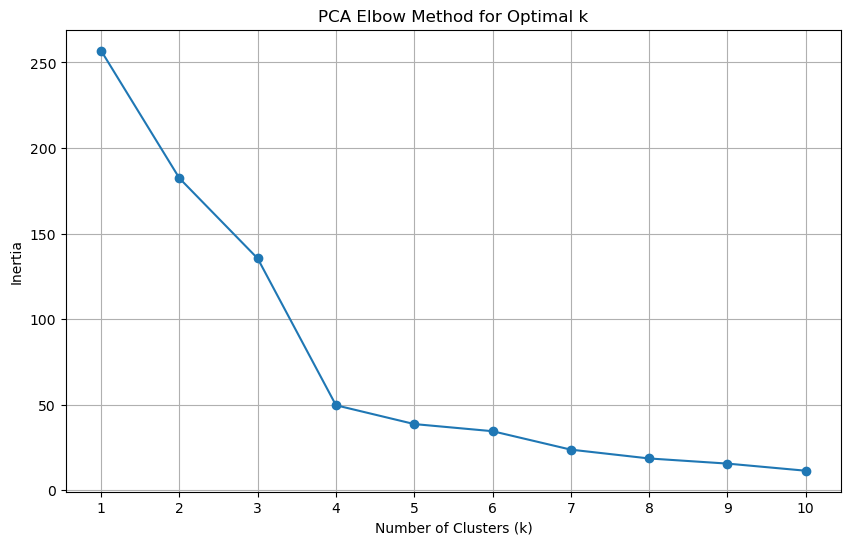

In [30]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('PCA Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid()
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4 is the best k value using PCA data.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** In this case, no, the k value is the same as when we used the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [31]:
# Initialize the K-Means model using the best value for k
k = 4
pca_cluster = KMeans(n_clusters=k, n_init='auto', random_state=1)

In [32]:
# Fit the K-Means model using the PCA data
pca_cluster.fit(pca_df)

KMeans(n_clusters=4, random_state=1)

In [33]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_cluster_predictions = pca_cluster.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_cluster_predictions)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [34]:
# Create a copy of the DataFrame with the PCA data
copy_pca = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
copy_pca["Predicted_Clusters"] = pca_cluster_predictions

# Display sample data
copy_pca.head(5)


,PCA1,PCA2,PCA3,Predicted_Clusters
Coin_ID,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


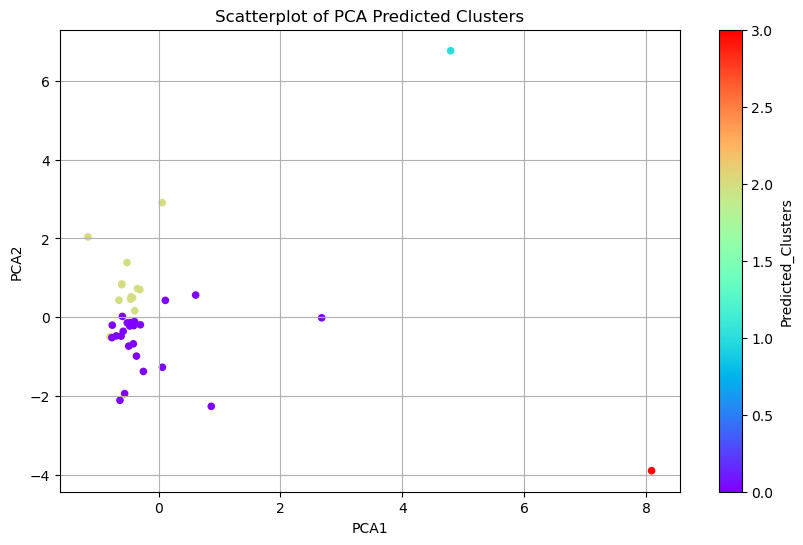

In [35]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
copy_pca.plot(kind='scatter', 
              x='PCA1', 
              y='PCA2', 
              c='Predicted_Clusters',  
              colormap='rainbow',  
              figsize=(10, 6))

plt.title('Scatterplot of PCA Predicted Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid()
plt.show()


### Determine the Weights of Each Feature on each Principal Component

In [36]:
# Use the columns from the original scaled DataFrame as the index.
scaled_columns = pd.DataFrame(pca_model.components_.T,columns=["PCA1", "PCA2", "PCA3"],index=scaled_df.columns)
scaled_columns

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    

In [ ]:
The price change percentage (24h) has the most negative influence on both PCA1 and PCA3. The price change percentage (14d) and (30d) have the most positive effect on PCA2.
The price change percentage (200d) has the most positive influence on PCA1 and the price change percentage (7d) has the most positive influence on PCA3.